In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [5]:
with open('ztf_summer_school_neutrinos.pkl','rb') as f:
    ztf_data=pickle.load(f)

In [7]:
len(ztf_data)

1390

In [9]:
ztf_data.keys()

dict_keys(['ZTF18aazuywx', 'ZTF18aazeyil', 'ZTF19abjfxlr', 'ZTF18abcxagc', 'ZTF19abjfxdl', 'ZTF18abastul', 'ZTF19acbwovv', 'ZTF19acbxaxa', 'ZTF19acbxany', 'ZTF19abjfmoo', 'ZTF19acbxapt', 'ZTF19abeyoxs', 'ZTF18aazezeo', 'ZTF19abjfhjh', 'ZTF19acbxaje', 'ZTF18aazmxba', 'ZTF19acbwzzm', 'ZTF18abnyicb', 'ZTF19abjflvt', 'ZTF19acbxajj', 'ZTF18aazmwns', 'ZTF19abjfiik', 'ZTF19acbwzul', 'ZTF19acbwzvf', 'ZTF19acbxbcs', 'ZTF19acbxajz', 'ZTF18abwenjk', 'ZTF19acbxwkk', 'ZTF18abksiie', 'ZTF18abasuad', 'ZTF18abaqbwc', 'ZTF19acbwzxc', 'ZTF19acbpqui', 'ZTF18abgsijw', 'ZTF19abuojek', 'ZTF19aazlurs', 'ZTF19acbwzzf', 'ZTF19abjfrjn', 'ZTF18aazuzfj', 'ZTF18abbujqg', 'ZTF19acbwogs', 'ZTF19acbwnwh', 'ZTF19aasspeo', 'ZTF19acbxbbq', 'ZTF19abexuuq', 'ZTF19abjfikj', 'ZTF18abadisz', 'ZTF18acswrkq', 'ZTF18abascgd', 'ZTF19acbwztw', 'ZTF18abadipd', 'ZTF18abbdnle', 'ZTF19aassock', 'ZTF18abgsvxf', 'ZTF19acbwozc', 'ZTF18abdkths', 'ZTF19acbxaue', 'ZTF19acbwopp', 'ZTF18aazuzla', 'ZTF18aazeyzn', 'ZTF19acbwoyq', 'ZTF19acbxwcc

In [10]:
ztf_data['ZTF18aazuywx']

{'schemavsn': '3.3',
 'publisher': 'Ampel',
 'objectId': 'ZTF18aazuywx',
 'candid': 2028358202015015006,
 'candidate': {'jd': 2459782.858206,
  'fid': 2,
  'pid': 2028358202015,
  'diffmaglim': 20.1015033721924,
  'programid': 1,
  'candid': 2028358202015015006,
  'isdiffpos': 't',
  'tblid': 6,
  'nid': 2028,
  'rcid': 20,
  'field': 543,
  'xpos': 1557.37841796875,
  'ypos': 868.012512207031,
  'ra': 314.3098239,
  'dec': 11.4163095,
  'magpsf': 17.3385486602783,
  'sigmapsf': 0.0532467849552631,
  'chipsf': 13.5866136550903,
  'magap': 17.3230991363525,
  'sigmagap': 0.0320000015199184,
  'distnr': 0.334238827228546,
  'magnr': 16.4130001068115,
  'sigmagnr': 0.0209999997168779,
  'chinr': 0.800000011920929,
  'sharpnr': -0.0469999983906746,
  'sky': 0.63947868347168,
  'magdiff': -0.0154489995911717,
  'fwhm': 6.09999990463257,
  'classtar': 1.0,
  'mindtoedge': 868.012512207031,
  'magfromlim': 2.77840328216553,
  'seeratio': 0.439488619565964,
  'aimage': 1.01800000667572,
  'bim

Text(0, 0.5, 'Declination [deg]')

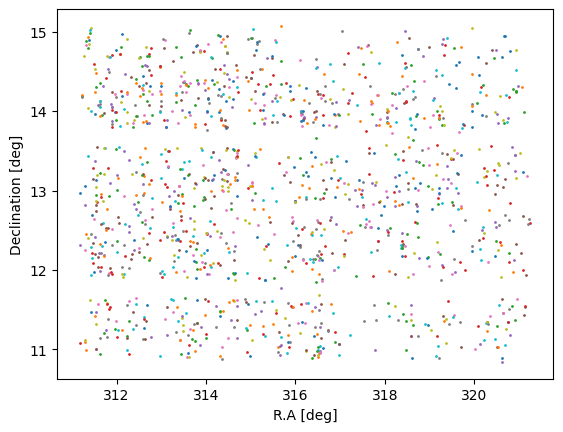

In [12]:
for source in ztf_data.values():
    plt.scatter(source['candidate']['ra'],source['candidate']['dec'],s=1)
plt.xlabel("R.A [deg]")
plt.ylabel("Declination [deg]")

In [14]:
BAND_NAMES = {1: "ZTF g", 2: "ZTF r", 3: "ZTF i"}
BAND_COLORS = {1: "green", 2: "red", 3: "orange"}

neutrino_jd = 2458758.339793634

def plot_lightcurve(ztf_alert):

    plt.figure()
    ax = plt.subplot(111)  
    all_detections = ztf_alert["prv_candidates"] + [ztf_alert["candidate"]]
    
    for detection in all_detections:
        c = BAND_COLORS[detection["fid"]]
        
        if "magpsf" in detection.keys():
            plt.scatter(detection["jd"], detection["magpsf"], c=c)
            plt.errorbar(detection["jd"], detection["magpsf"], yerr=detection["sigmapsf"], c=c)
        else:
            plt.scatter(detection["jd"], detection["diffmaglim"], c=c, marker="v", s=1.3, alpha=0.5,)

    plt.axvline(neutrino_jd, color="blue", linestyle=":", label="IC191001A")
    ax.invert_yaxis()
    plt.ylabel("Apparent Magnitude [AB]")
    plt.xlabel("Time [JD]")
    plt.legend()
    plt.title(ztf_alert["objectId"])

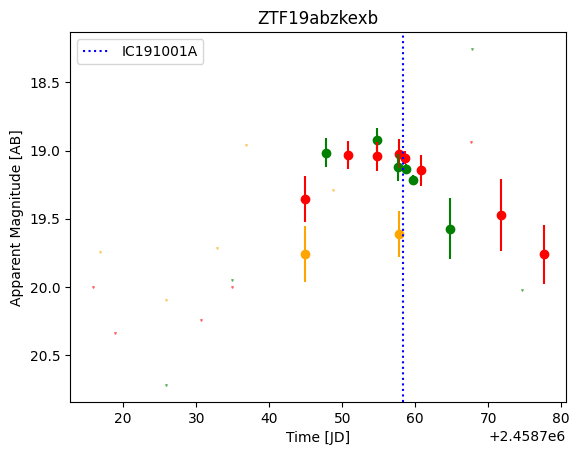

In [15]:
plot_lightcurve(ztf_data["ZTF19abzkexb"])

### Single detection, rise and fall of lightcurve, cools down with time-->likely supernova transient

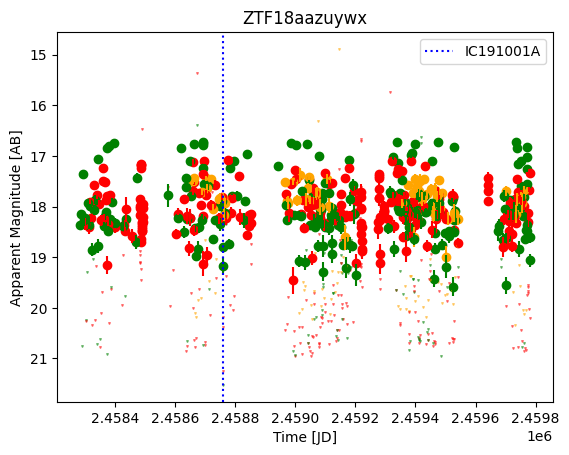

In [16]:
plot_lightcurve(ztf_data['ZTF18aazuywx'])

### Likely a variable(AGN)

## Filter

    Image artifacts 
    Solar system objects 
    Stars
    
## Classify
    Active Galactic Nuclei
    Transients


## Image Artifacts

<function matplotlib.pyplot.show(close=None, block=None)>

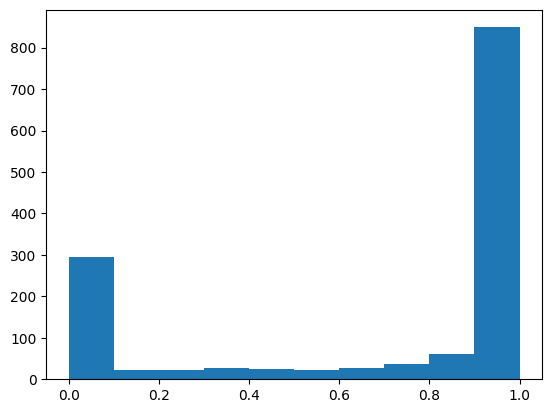

In [18]:
drb=[alert['candidate']['drb'] for alert in ztf_data.values()]
plt.hist(drb)
plt.show

In [65]:
alerts=[i for i in ztf_data.keys()]
next_candidates = {alert:ztf_data[alert] for alert in alerts if ztf_data[alert]['candidate']['drb'] > 0.5}
image_artifacts= [i for i in ztf_data.keys() if i not in next_candidates]

## Solar System Objects

In [66]:
alerts=[i for i in next_candidates.keys()]
next_candidates = {alert:next_candidates[alert] for alert in alerts 
                  if next_candidates[alert]['candidate']['jdendhist']-next_candidates[alert]['candidate']['jdstarthist']>=15/60/24}
ssos=[i for i in ztf_data.keys() if (i not in next_candidates and i not in image_artifacts)]

## Stars

<function matplotlib.pyplot.show(close=None, block=None)>

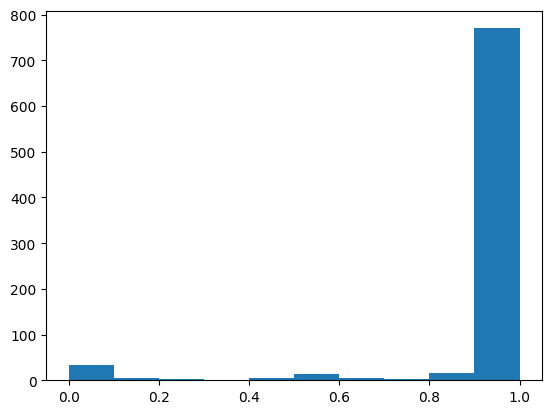

In [67]:
sgscore=[alert['candidate']['sgscore1'] for alert in next_candidates.values()]
plt.hist(sgscore)
plt.show

In [68]:
# If dist to nearest Panstarrs source <3" and the sgscore>0.5, star.

alerts=[i for i in next_candidates.keys()]
next_candidates = {alert:next_candidates[alert] for alert in alerts 
                   if (next_candidates[alert]['candidate']['distpsnr1'] > 3 and next_candidates[alert]['candidate']['sgscore1']>=0.5)
                   or 
                   next_candidates[alert]['candidate']['sgscore1'] < 0.5}
stars=[i for i in ztf_data.keys() if (i not in next_candidates and i not in image_artifacts and i not in ssos)]

In [55]:
next_candidates.keys()

dict_keys(['ZTF19acbpqui', 'ZTF19abjfikj', 'ZTF19acbwzuc', 'ZTF19abjficg', 'ZTF19acbwpqs', 'ZTF19aapreis', 'ZTF19acbxaqg', 'ZTF19abexshr', 'ZTF19abeyhsj', 'ZTF18aboclga', 'ZTF19abexoof', 'ZTF19acbwosz', 'ZTF18aazmwmo', 'ZTF18abflhtt', 'ZTF18abulekb', 'ZTF19acbkqdn', 'ZTF19abjfjbc', 'ZTF18acbwtrm', 'ZTF19abjfigs', 'ZTF19abjfmem', 'ZTF19acbpqfn', 'ZTF19acbwpoq', 'ZTF18ablvxkp', 'ZTF19abassjx', 'ZTF18absoqfm', 'ZTF19abeyfkk', 'ZTF19abjflrg', 'ZTF19acbxahc', 'ZTF19acbxbjq', 'ZTF19abjflgz', 'ZTF19aazfqln', 'ZTF19abjfljg', 'ZTF19aawfewz', 'ZTF19abcdynm', 'ZTF19abjfjjp', 'ZTF19abjflnc', 'ZTF19abdzdsw', 'ZTF19abjfhxd', 'ZTF18abhotgt', 'ZTF19acbxawg', 'ZTF19abjfhmo', 'ZTF19acbxauk', 'ZTF19abjfxly', 'ZTF19abjfhme', 'ZTF19acbxanz', 'ZTF19abjfxep', 'ZTF19abeyujp', 'ZTF19abjfibc', 'ZTF19acbxaqj', 'ZTF19abjflqv'])

/tmp/ipykernel_4057/4076012381.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


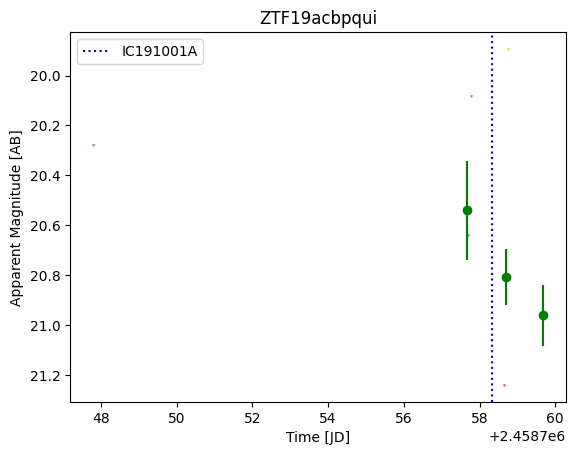

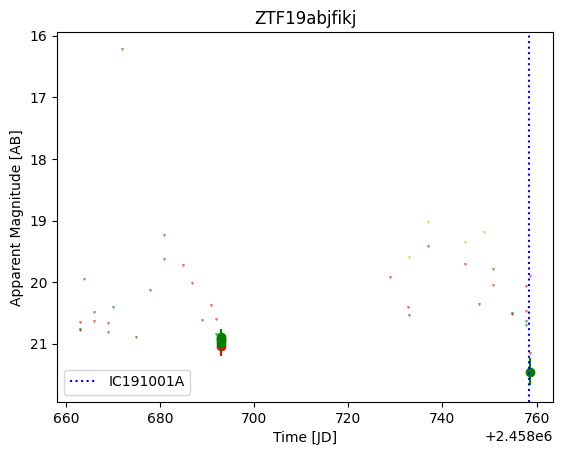

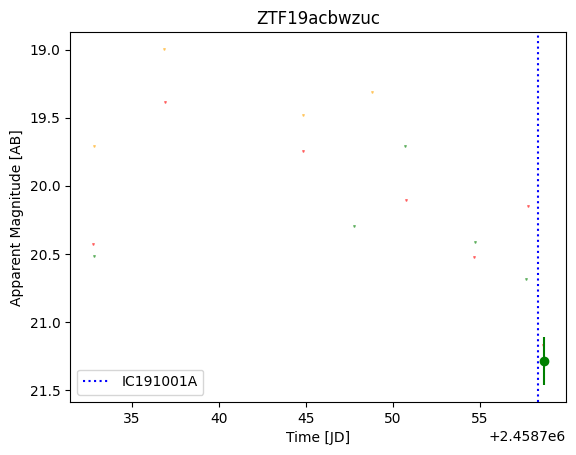

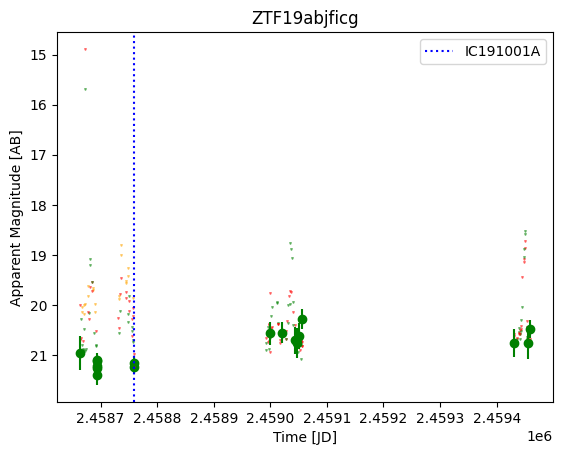

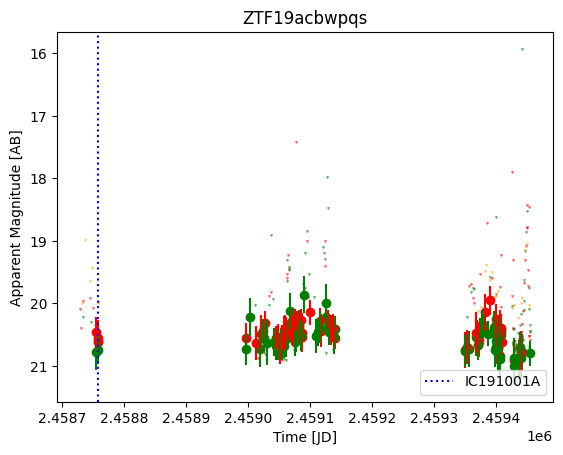

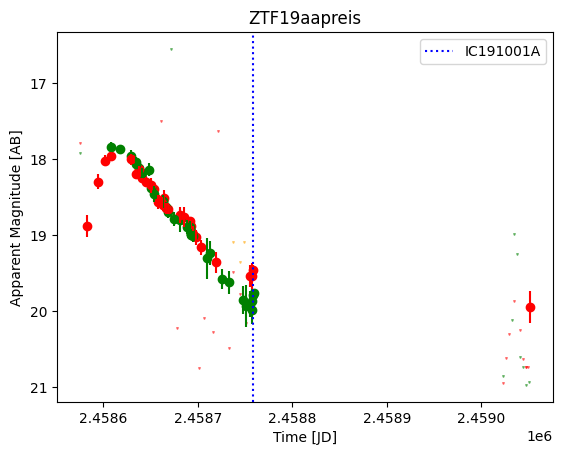

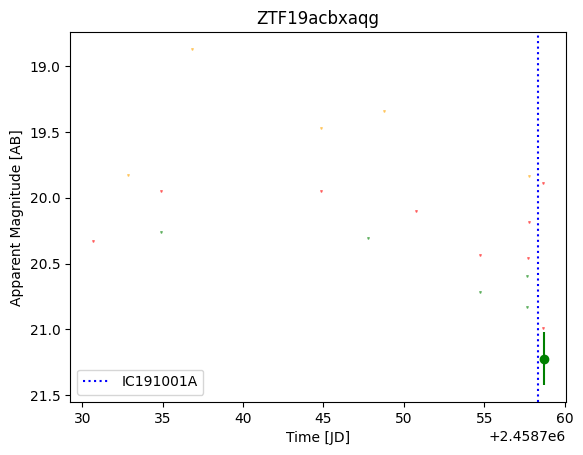

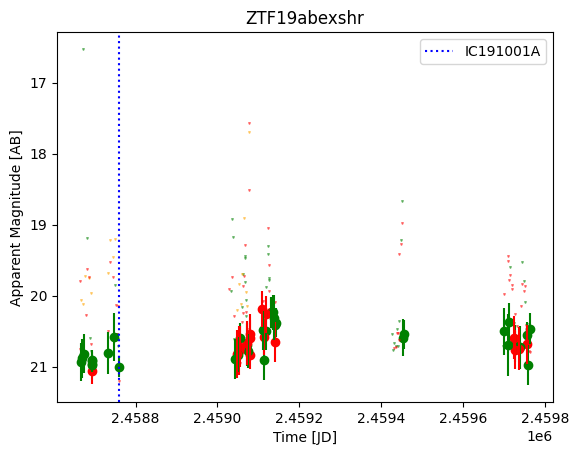

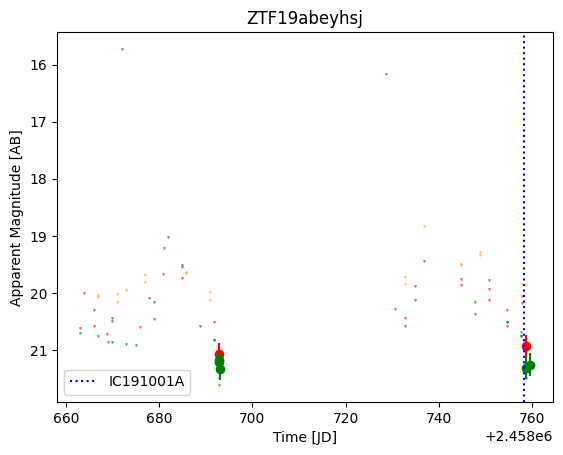

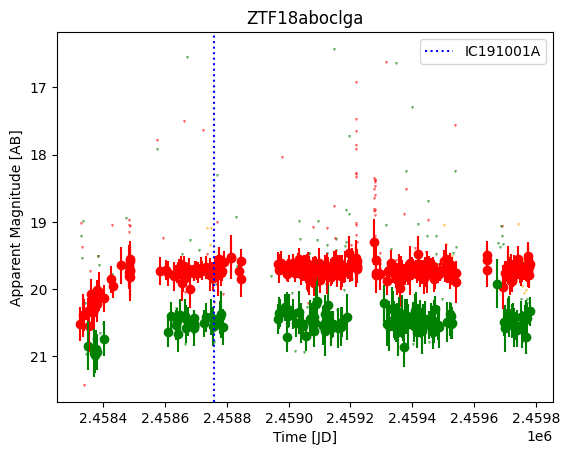

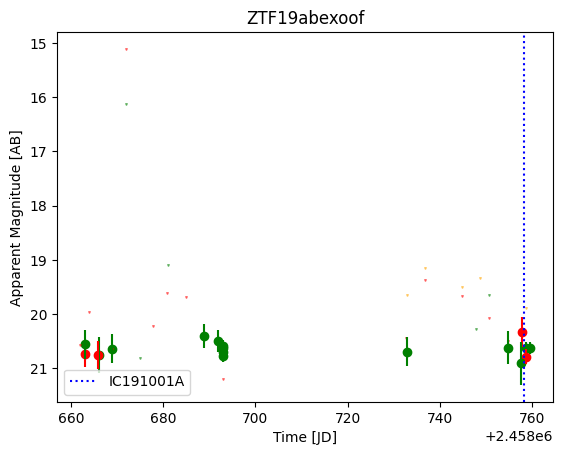

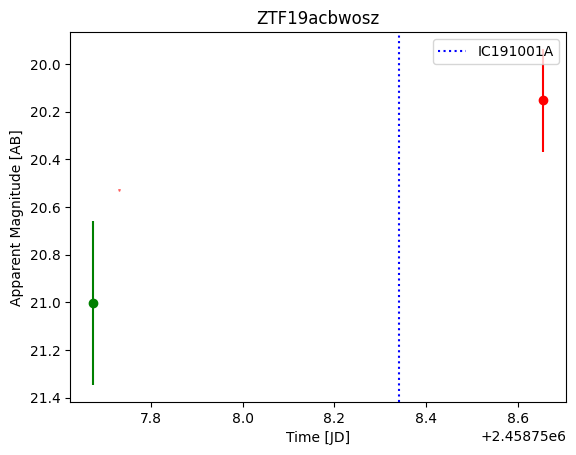

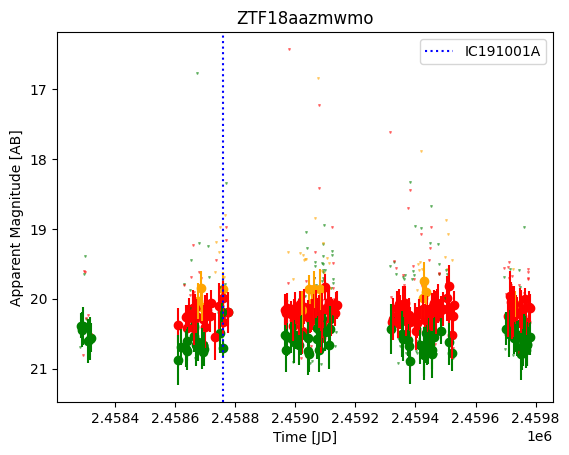

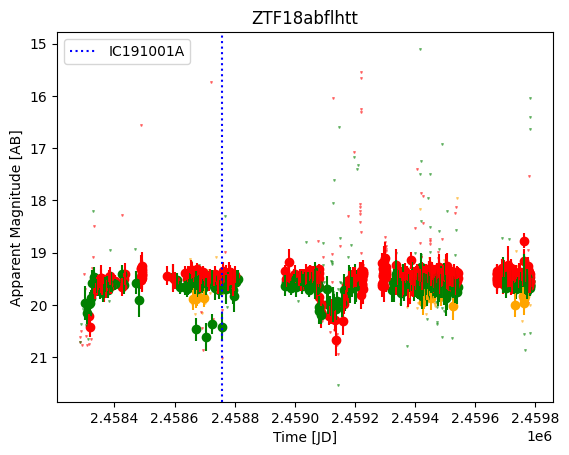

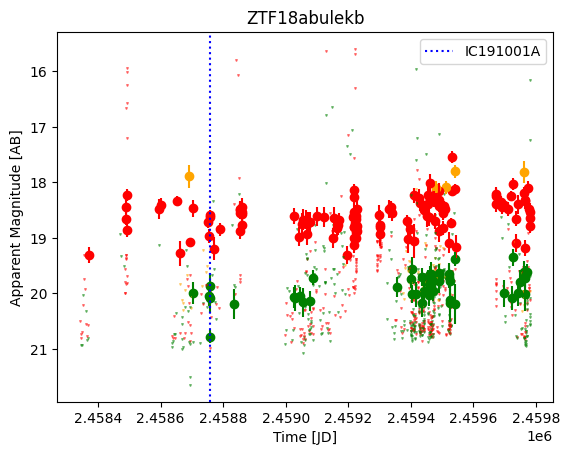

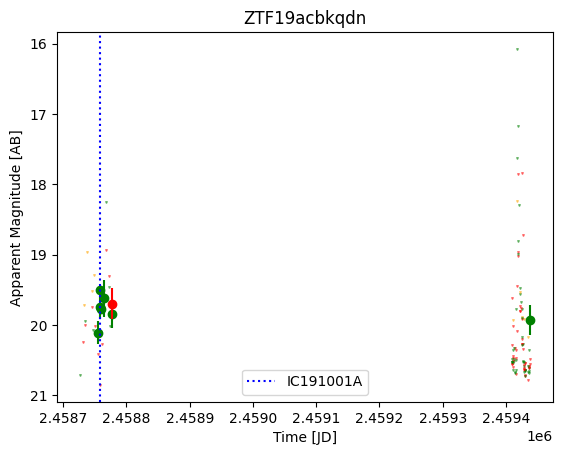

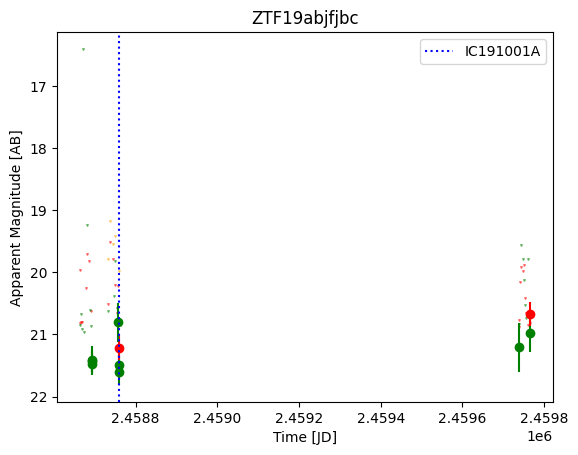

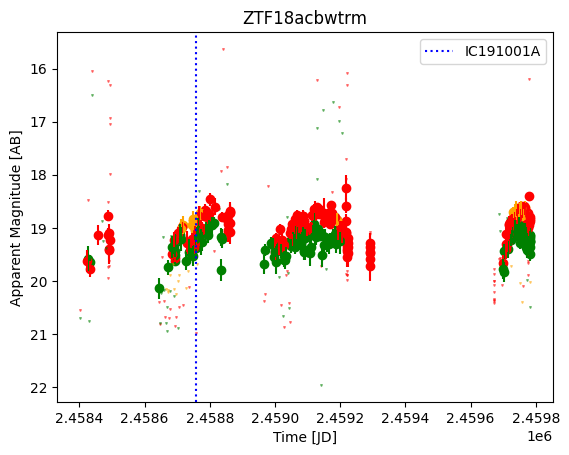

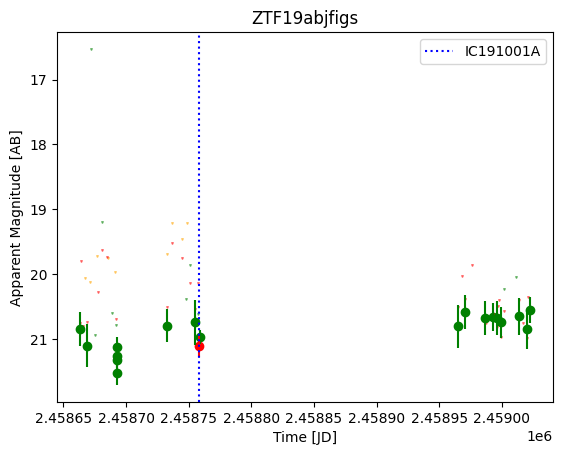

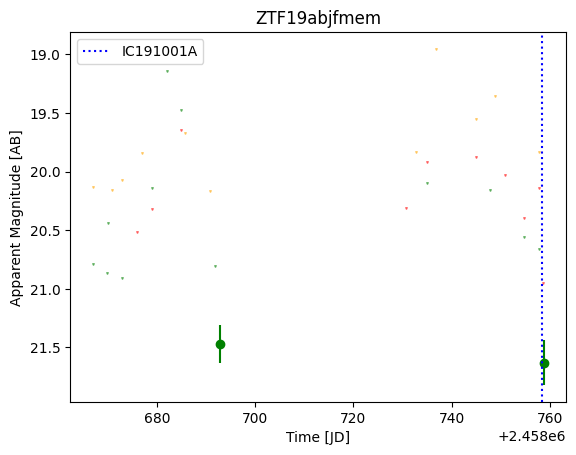

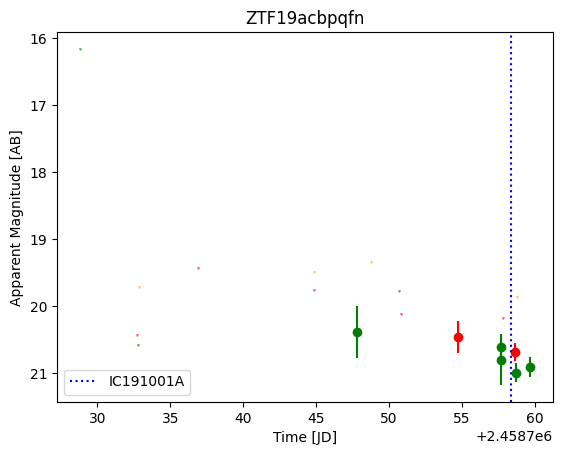

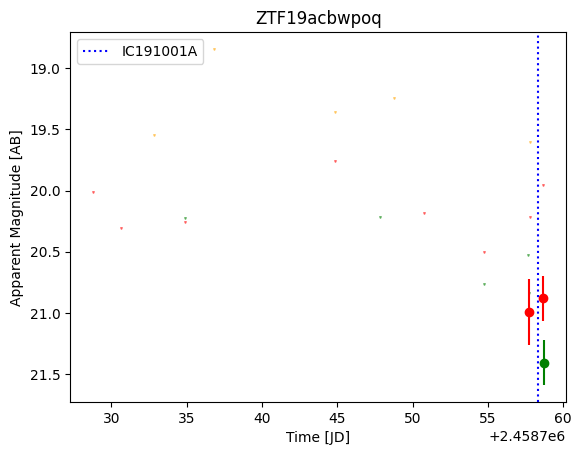

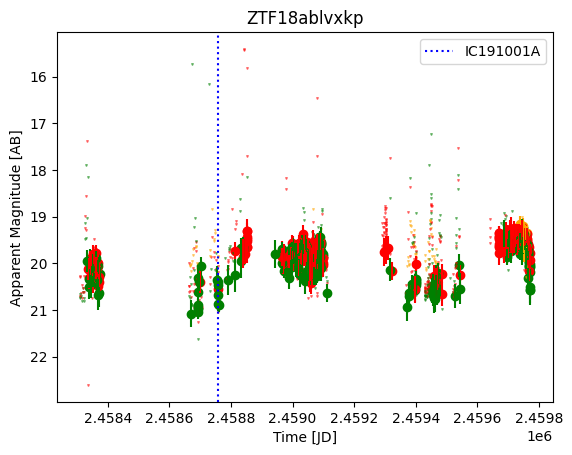

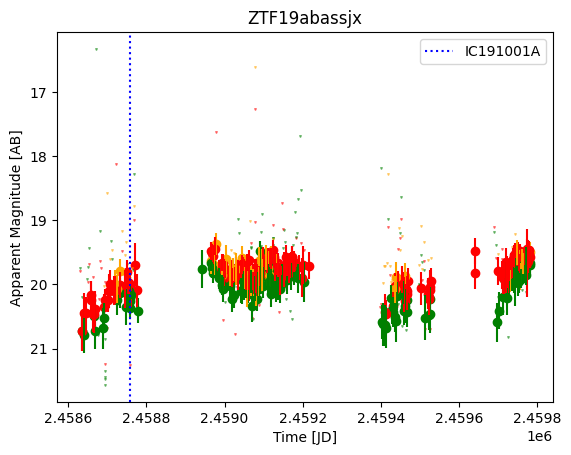

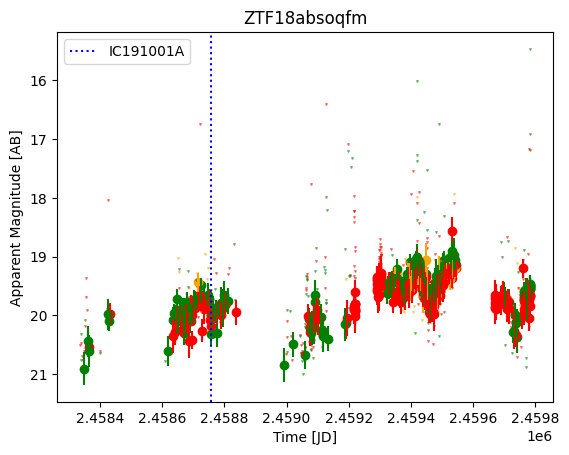

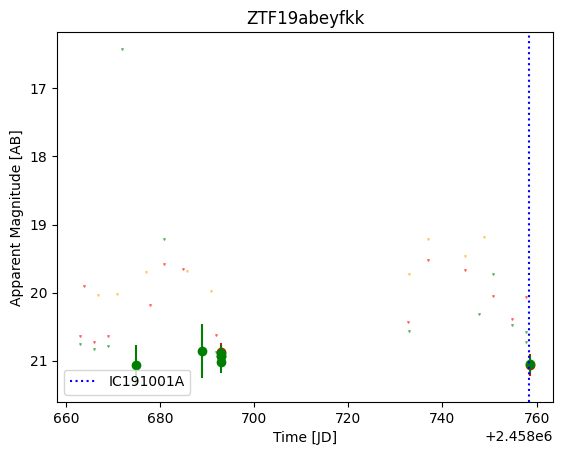

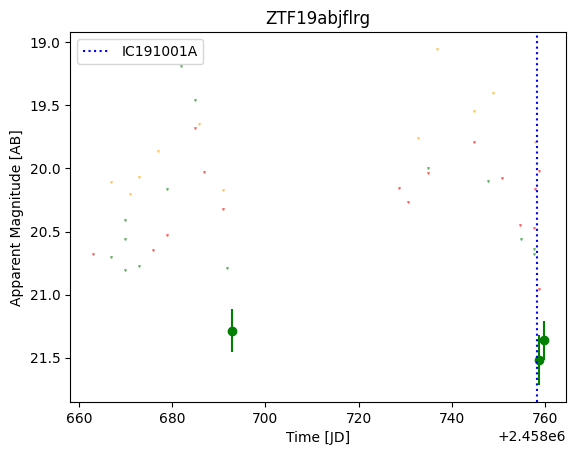

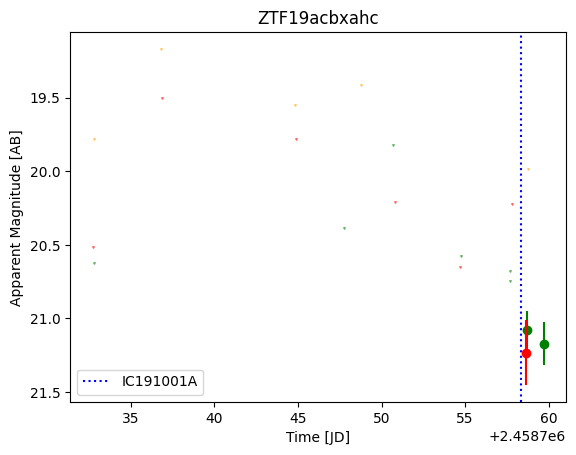

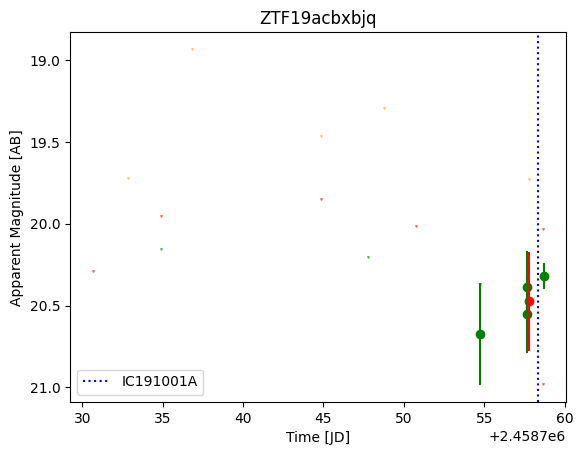

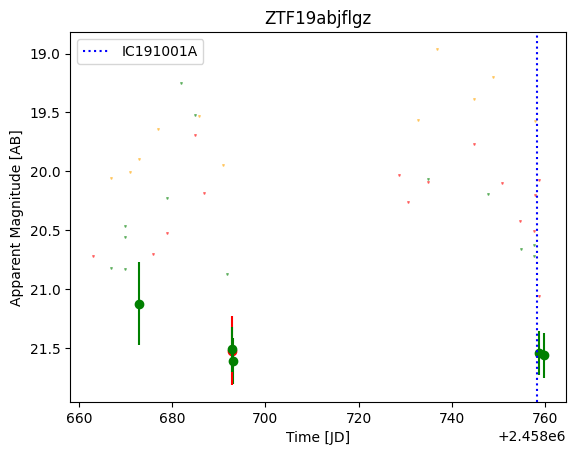

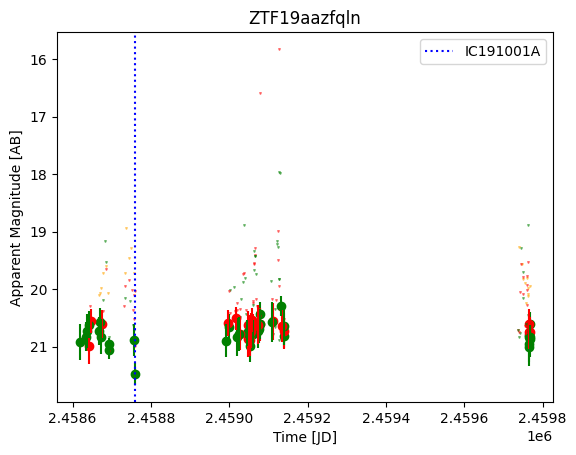

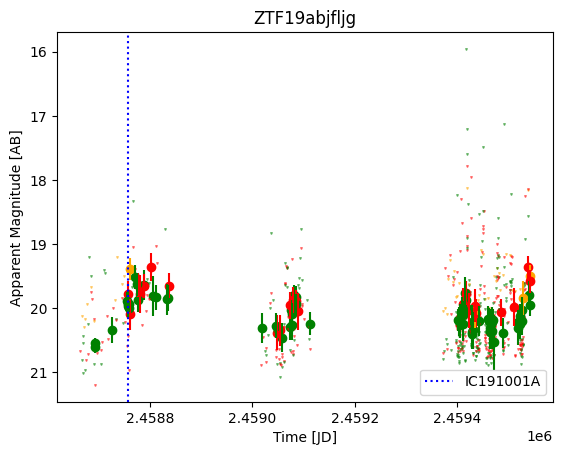

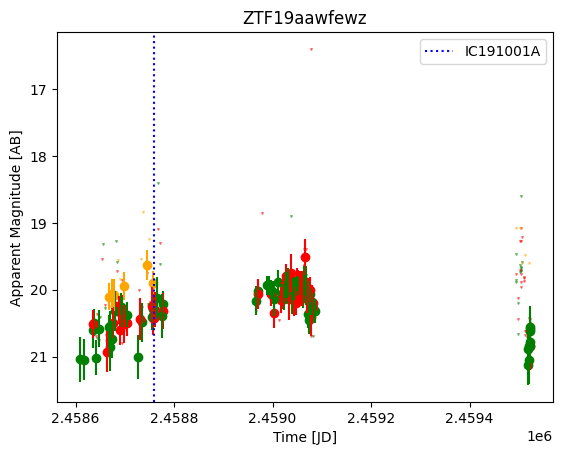

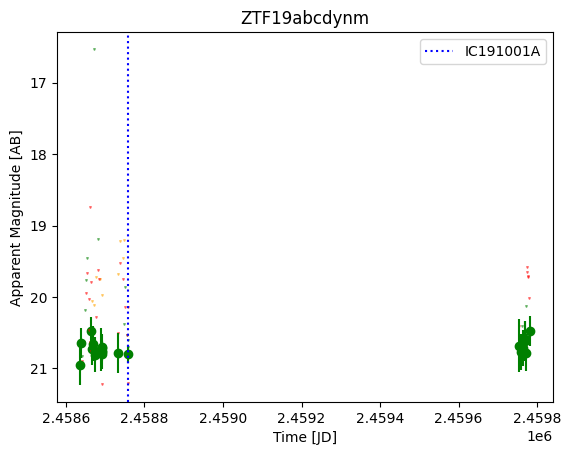

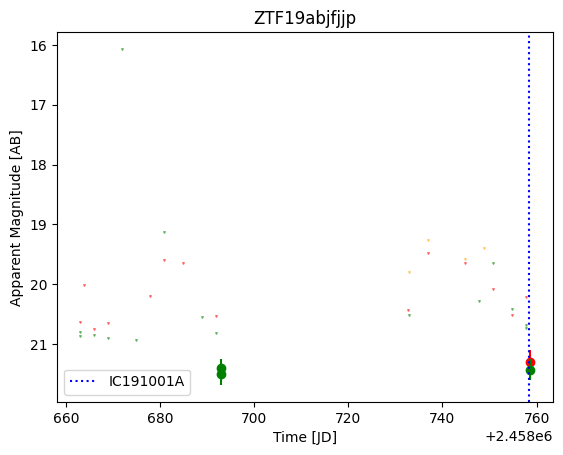

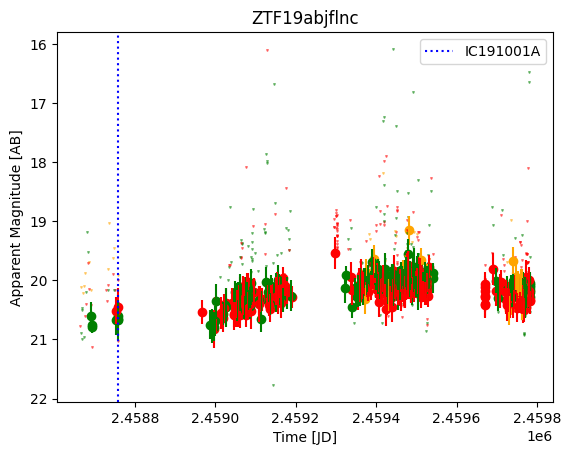

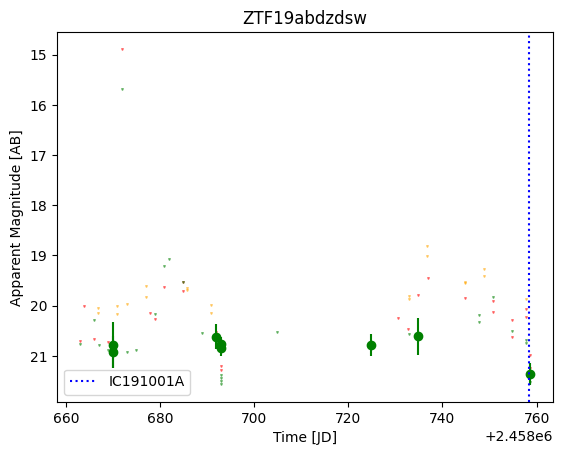

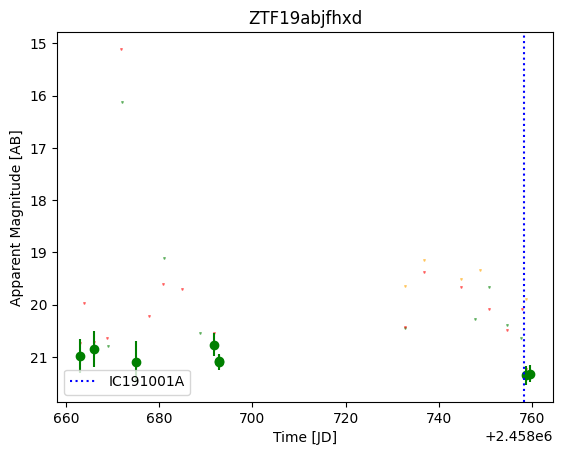

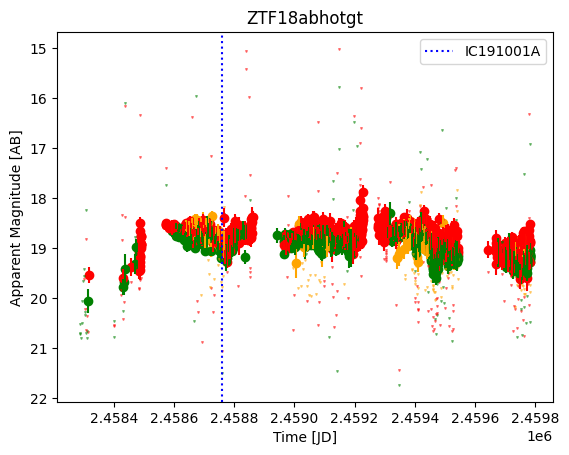

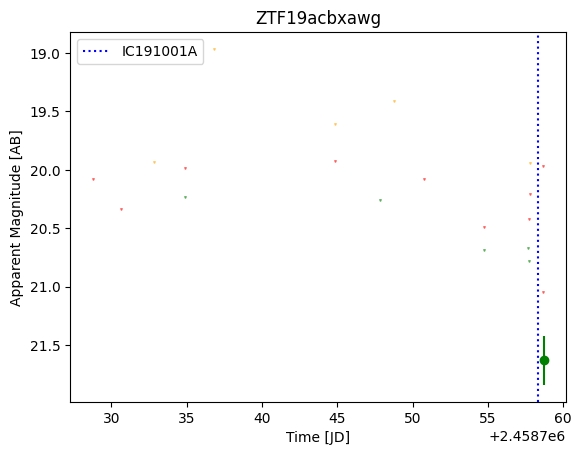

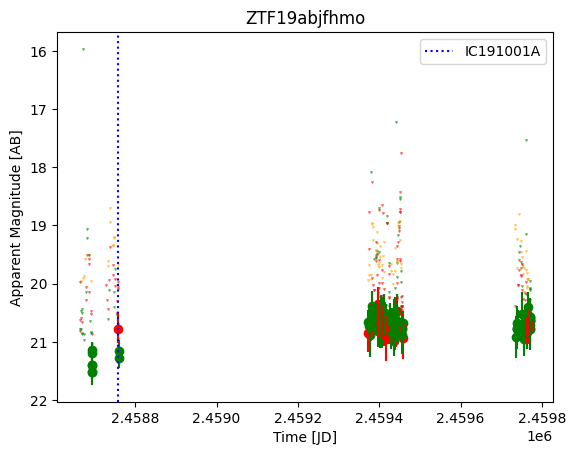

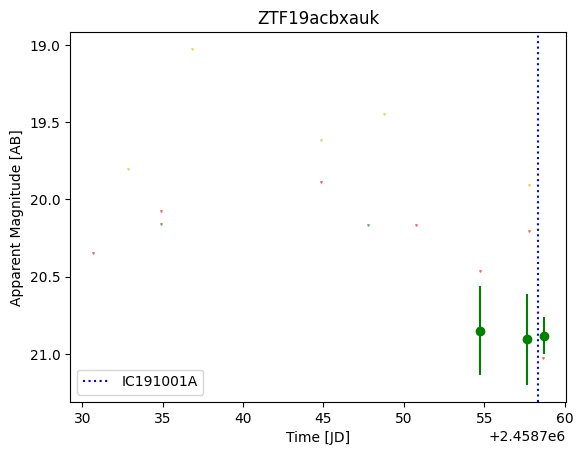

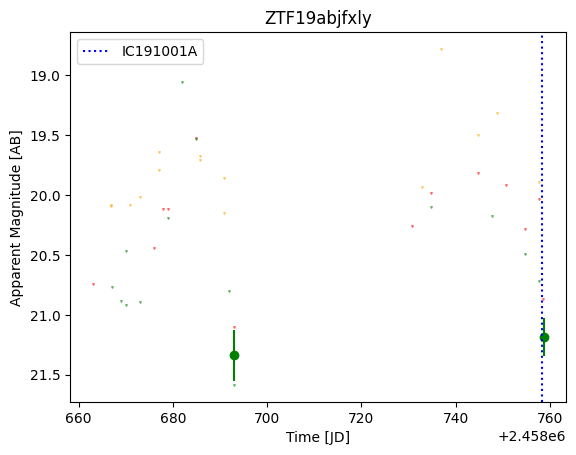

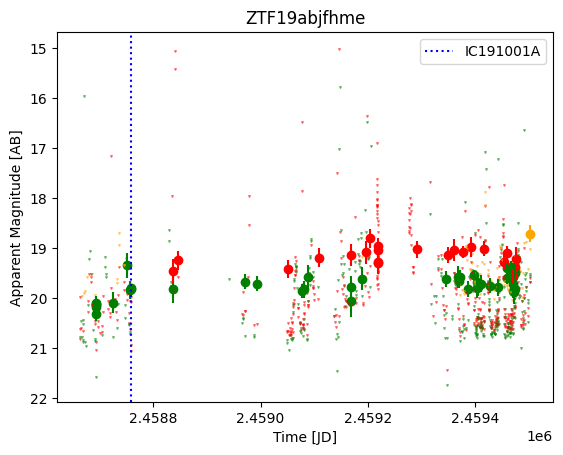

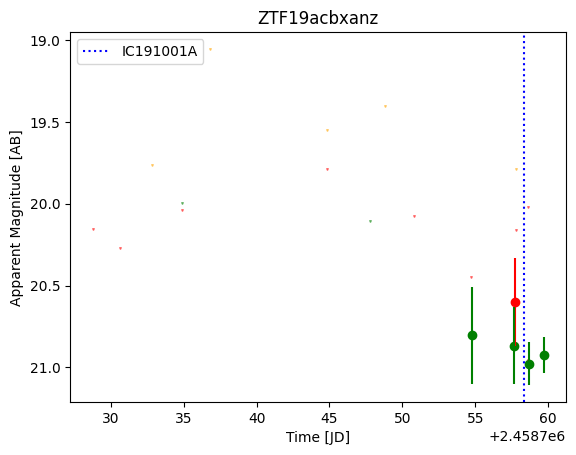

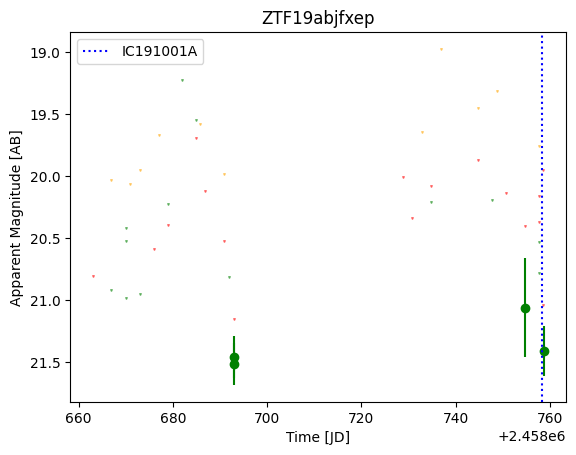

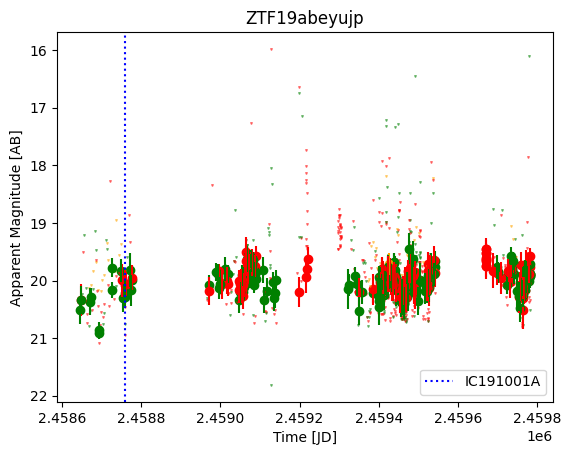

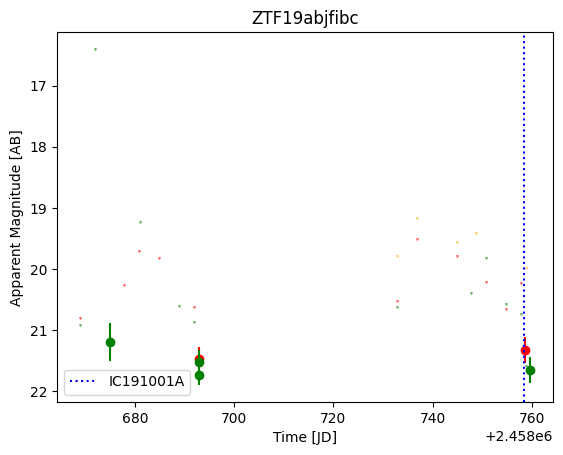

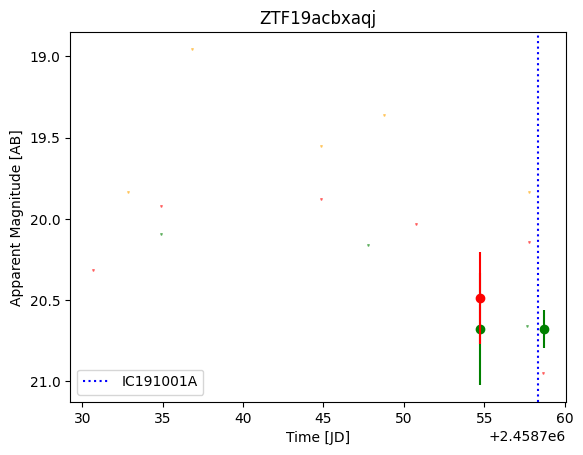

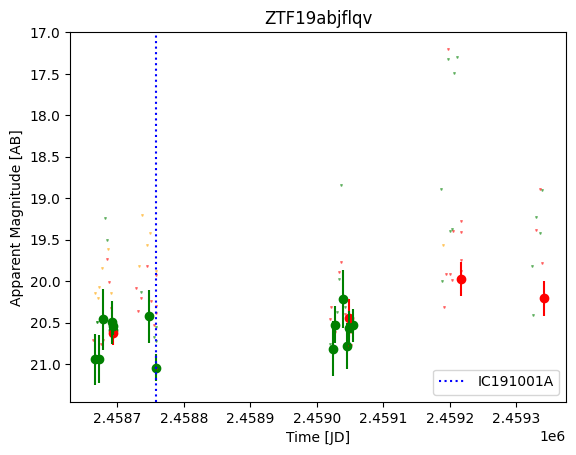

In [69]:
for leftovers in next_candidates.keys():
    plot_lightcurve(ztf_data[leftovers])

## Classification
Periodicity--> Characteristic of AGNs(not transients!)

### Probable/Definite Transients:

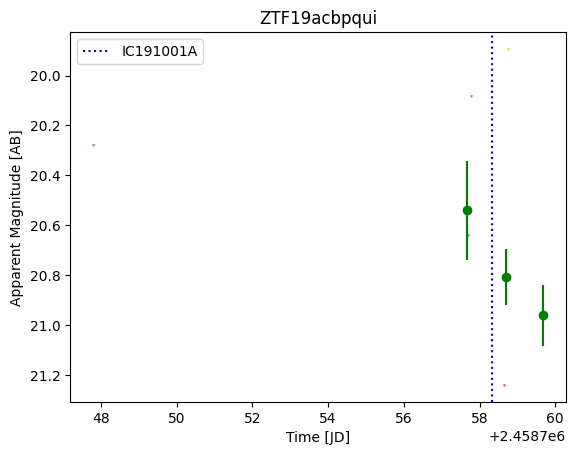

In [77]:
plot_lightcurve(ztf_data['ZTF19acbpqui'])

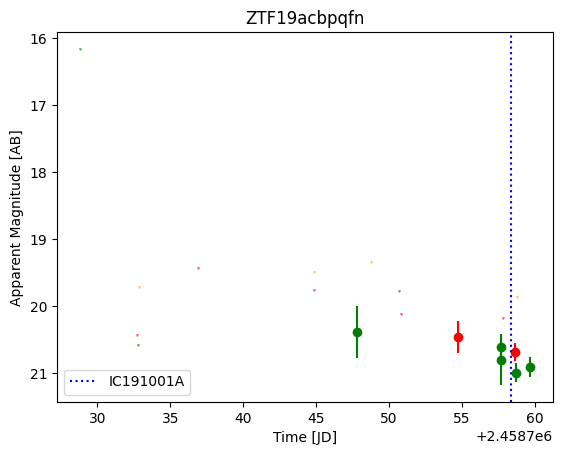

In [79]:
plot_lightcurve(ztf_data['ZTF19acbpqfn'])

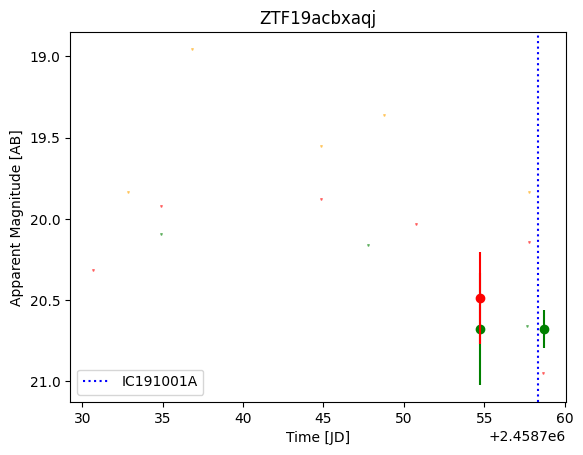

In [80]:
plot_lightcurve(ztf_data['ZTF19acbxaqj'])

#### TIDAL DISRUPTION EVENT- SOURCE OF NEUTRINO!

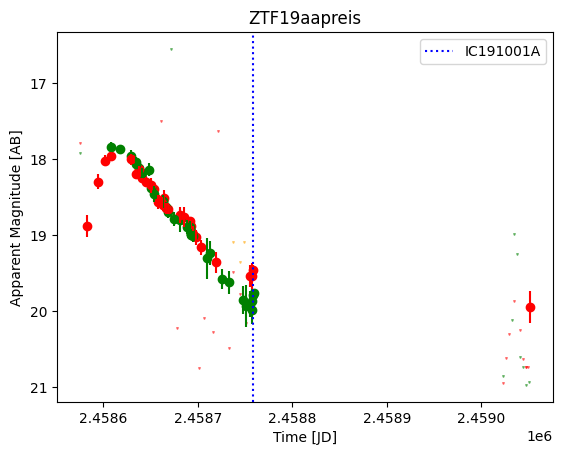

In [59]:
plot_lightcurve(ztf_data['ZTF19aapreis'])

([<matplotlib.patches.Wedge at 0x7f671d021b50>,
 [Text(0.6938612475815693, 0.8535552525200396, 'Image Artifacts'),
  Text(-0.9895195820935365, -0.48046955850858336, 'Stars'),
  Text(0.9382287505046278, -0.5742184355509016, 'SSOs'),
  Text(1.0929836539244304, -0.12404326766899229, 'Transient/AGN Candidates')])

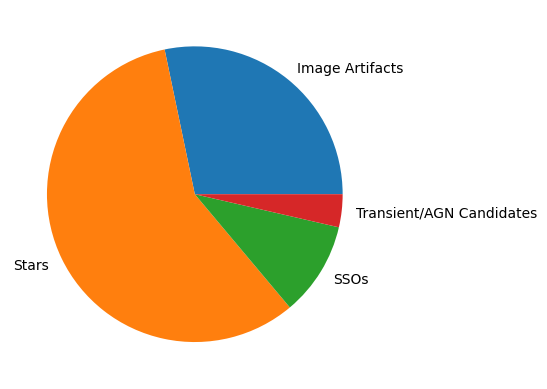

In [81]:
plt.pie([len(image_artifacts),len(stars),len(ssos),len(next_candidates)],
       labels=['Image Artifacts','Stars','SSOs','Transient/AGN Candidates'])